In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1) 가상 데이터로 실습하기

## 1.1 가상 데이터 생성

분류용 데이터 생성 메서드를 이용해서 label이 없는 데이터를 생성해보자.

make_blobs를 이용해 정규분포(가우시안 분포)를 따르는 클러스터링용 가상데이터를 만들 수 있다.

* 주요 parameter:
 - `n_samples` : data의 수, 기본값은 100  
 - `n_features` : feature의 수, 기본값은 2  
 - `centers` : 생성할 클러스터의 수, 기본값은 3  
 - `cluster_std` : 클러스터의 표준편차, 기본값은 1.0  
 - `random_state` : 난수

* 반환값:
 - `X` : [n_samples, n_features] 크기의 배열 
 - `y` : [n_samples] 크기의 배열

참고 : [make_blobs 가이드](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs)


In [ ]:
from sklearn.datasets import make_blobs

# 3개의 중심점을 가지는 데이터 200개를 생성
input_feature, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.8, random_state=30)
input_feature[:5]

array([[ 3.81973573, -3.93378985],
       [ 7.80431196, -2.22072597],
       [10.38282826, -2.47931292],
       [ 2.71876054, -2.42151074],
       [ 2.19961744, -6.87940843]])

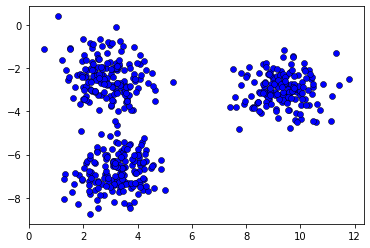

In [ ]:
plt.scatter(input_feature[:, 0], input_feature[:, 1], c='blue', edgecolor='k', lw=0.5)
plt.show()

**[잠깐! 상식 - 1]**  
**plt.scatter 함수에 대해 알아보자**  
.  
plt.scatter( A , B , ... )  
.  
scatter 는 산점도를 그려주는 함수다.   
plt.scatter(A, B)를 하면, 좌표 (A, B) 에 점을 찍어준다는 의미다.   
예) plt.scatter(1, 2) 라고 한다면, 좌표 (1, 2) 에 점을 하나 찍는다.   
.  
그럼 동시에 여러개의 점을 찍고 싶다면?  
예를 들어, 좌표 (1, 2) , 좌표 (3, 1), 좌표 (4, 3) 세 개의 점을 한번에 찍고 싶다면  
아래와 같이 A 자리에 [1, 3, 4], B 자리에 [2, 1, 3]을 작성해주면 된다.  
.  
plt.scatter([1, 3, 4], [2, 1, 3])

**[잠깐! 상식 - 2]**  
**numpy array를 알아보자.**  

위에서 input_feature 와 같이 여러 숫자를 array[ ] 형식으로 담고 있는 데이터 형식이 바로 numpy의 array다.  
.  
그럼 예를 들어,  
A = array([[1, 2],  
           [3, 4],  
           [5, 6]])  
           와 같은 array가 있을 때,   
           1, 3, 5만 지정하고 싶다면 어떻게 해야할까?  
.  
우선 A[0] = [1, 2],  
    A[1] = [3, 4],  
    A[2] = [5, 6] 이다.  
.  
그럼, A[0, 0] = 1,  
     A[1, 0] = 3,  
     A[2, 0] = 5 다.  
(여기까지를 Indexing 이라고 말한다.)  
.  
자 이제, A[0, 0], A[1, 0], A[2, 0]을 한번에 표현하는 법만 알면된다.  
.  
A[:, 0] 이렇게 표현하면 된다.(이를 Slicing이라고 한다.)  
1, 3 = A[:2, 0],  
3, 5 = A[1:, 0],
1, 3, 5 = A[:,0] 으로 표현할 수 있다. 

## 1.2 모델링

KMeans
* 주요 parameter:
 - `init` : 초기 군집 중심점의 좌표를 설정할 방식, 기본값은 'k-means++'  
 - `n_clusters` : 군집화할 개수, 즉 군집 중심점의 개수, 기본값은 8
 - `max_iter` : 중심점 이동 최대 반복 횟수, 기본값은 300
        max_iter 횟수만큼만 학습을 반복한다
        만약, max_iter 이전에 더이상 중심점 이동이 없다면 학습을 중단한다

* 주요 Attributes:
 - `cluster__centers_` : 군집 중심점의 좌표(Coordinates of cluster centers)
 - `labels_` : 각 데이터 포인트들의 label값(Labels of each point)
 - `inertia_` : 각 데이터에서 해당 군집의 중심점까지의 거리 제곱합(Sum of squared distances of samples to their closest cluster center.)
 - `n_iter_` : 반복 실행 횟수(Number of iterations run.)




참고 : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

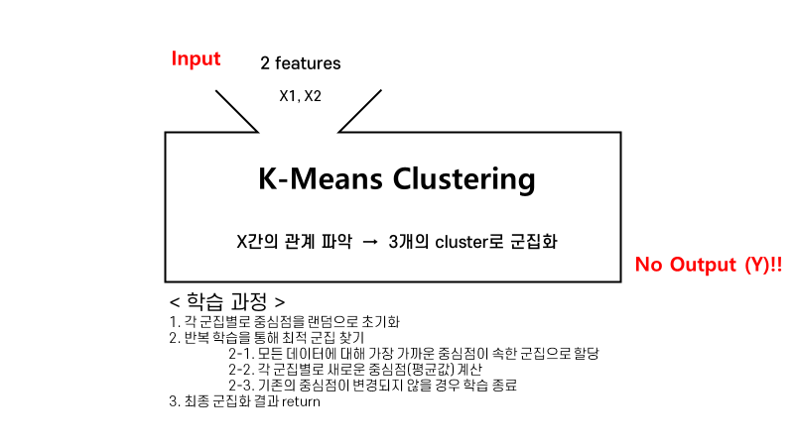

In [ ]:
# KMeans의 학습과정은 아래 그림과 같다.

from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif')

source: https://en.wikipedia.org/wiki/K-means_clustering#/media/File:K-means_convergence.gif

### 초기값(init) 설정 방식

가장 먼저 random 방식으로 초기값을 설정해보자

In [ ]:
model_r = KMeans(n_clusters=3, init='random', random_state = 0)
model_r.fit(input_feature) 

In [ ]:
# kmeans 수행후 군집의 중심점을 확인해보자.
center = model_r.cluster_centers_
center

array([[ 9.35580282, -2.99486951],
       [ 3.2319887 , -6.76308343],
       [ 2.89624225, -2.4005825 ]])

In [ ]:
c0 = center[0]
c1 = center[1]
c2 = center[2]

**그럼 이제, 데이터가 클러스터링된 결과를 시각화해서 확인해보자**  
.    
plt.scatter(cluster_0 에 속한 데이터만, 초록색(g)으로)  
plt.scatter(cluster_1 에 속한 데이터만, 빨간색(r)으로)  
plt.scatter(cluster_2 에 속한 데이터만, 파란색(b)으로)  
.   
plt.scatter(cluster_0 중심값, size는 200으로) # 기본값 = 100  
plt.scatter(cluster_1 중심값, size는 200으로) # 기본값 = 100  
plt.scatter(cluster_2 중심값, size는 200으로) # 기본값 = 100

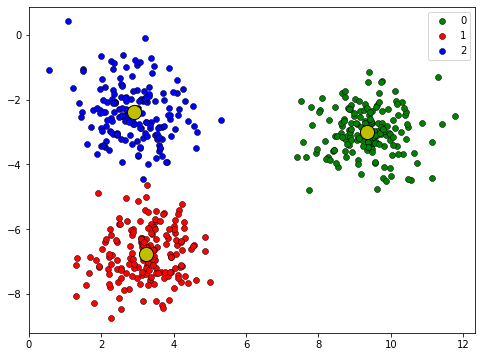

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(input_feature[model_r.labels_ == 0, 0], input_feature[model_r.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 1, 0], input_feature[model_r.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_r.labels_ == 2, 0], input_feature[model_r.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.scatter(c0[0], c0[1], s=200, c="y", edgecolor='k', lw=1)
plt.scatter(c1[0], c1[1], s=200, c="y", edgecolor='k', lw=1)
plt.scatter(c2[0], c2[1], s=200, c="y", edgecolor='k', lw=1)
plt.legend([0,1,2])
plt.show()

이번에는 초기화 방법(init)을 'k-means++'로 수정해보자

In [ ]:
model_pp = KMeans(n_clusters=3, init="k-means++", random_state = 0).fit(input_feature)

In [ ]:
center = model_pp.cluster_centers_

c0 = center[0]
c1 = center[1]
c2 = center[2]

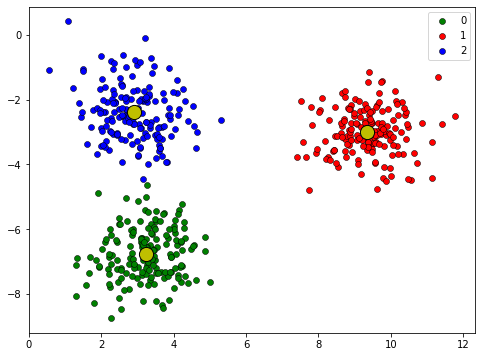

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(input_feature[model_pp.labels_ == 0, 0], input_feature[model_pp.labels_ == 0, 1], marker='o', c='g', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_pp.labels_ == 1, 0], input_feature[model_pp.labels_ == 1, 1], marker='o', c='r', edgecolor='k', lw=0.5)
plt.scatter(input_feature[model_pp.labels_ == 2, 0], input_feature[model_pp.labels_ == 2, 1], marker='o', c='b', edgecolor='k', lw=0.5)
plt.scatter(c0[0], c0[1], s=200, c="y", edgecolor='k', lw=1)
plt.scatter(c1[0], c1[1], s=200, c="y", edgecolor='k', lw=1)
plt.scatter(c2[0], c2[1], s=200, c="y", edgecolor='k', lw=1)
plt.legend([0,1,2])
plt.show()

### 적정 군집 개수(K)

K-Means의 적정 K를 판단하는 방법은 없을까?

K-Means는 처음에 클러스터의 갯수를 사람이 직접 설정해줘야하는 제약이 있다.  
그럼, 가장 적합한 K는 어떻게 판단할 수 있을까?  
.  
물론, 정성적으로 판단해서 정하기도 하지만,  
Sklearn에서 적정 K를 판단해주는 척도도 제공한다.  
.  
바로, 위에서 언급했던 Attributes 중 inertia_라는 값이다.  
.
inertia = Sum of squared distances of samples to their closest cluster center(자신의 클러스터 중심점과 데이터(samples) 간의 거리의 제곱합)  
.  
즉, 각 클러스터가 데이터와 중심점이 얼마나 가까이 붙어있는가를 의미하는 값이다.  
.  
중심점과 데이터가 가까이 붙어있을수록 클러스터의 응집도가 높다고 볼 수 있다.  
이 응집도를 클러스터의 평가 척도로 사용할 수 있다.  
.  
하지만, inertia 값은 본질 상, 클러스터가 커질수록 값이 작아지므로,  
클러스터 수에 대한 inertia값의 추세를 보고 적절한 K를 선택해야한다.


In [ ]:
# k-means++ 로 초기 중심점을 설정한 모델의 inertia 값을 확인해보자
model_pp.inertia_

613.9042274680983

그럼, K 를 바꿔보면서 inertia_값의 변화를 한번 살펴보자.


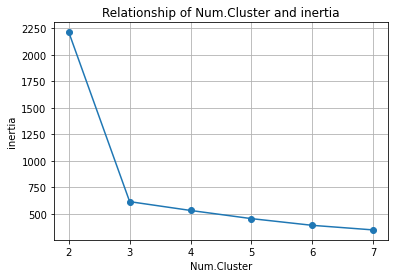

In [ ]:
set_k = [k for k in range(2, 8)]
set_inertia = []
for k in set_k:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(input_feature)

    set_inertia.append(model.inertia_)

plt.plot(set_k, set_inertia, '-o')

plt.title('Relationship of Num.Cluster and inertia')
plt.xlabel('Num.Cluster')
plt.ylabel('inertia')
plt.xticks(set_k)
plt.grid()
plt.show()

k의 증가에 따른 inertia 값의 변화 추세를 보면  
k = 3 일때 가장 많은 inertia값의 감소가 발생했고 이후에는 감소추세가 줄어든 것을 확인할 수 있다.  
.  
군집의 개수(k)를 3보다 큰 수로 설정할 경우 inertia값은 작아지겠지만 군집의 개수가 너무 많아져 유의미한 군집화가 이루어졌다고 할 수 없다.  
결국, 위의 데이터에서는 3개의 군집 개수가 가장 많은 inertia 감소폭을 보이는 최적 군집 개수라고 할 수 있다.

# 2) 붓꽃 데이터로 실습하기

### 2.1 데이터 로드 및 확인

붓꽃(iris) 꽃잎, 꽃받침의 너비와 길이를 측정한 데이터이며 150개의 샘플로 구성되어 있으며 3개의 레이블 클래스를 가진다.

feature  
* `sepal length` : 꽃받침의 길이
* `sepal width` : 꽃받침의 너비
* `petal length` : 꽃잎의 길이
* `petal width` : 꽃잎의 너비


<a title="No machine-readable author provided. Dlanglois assumed (based on copyright claims)., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg"><img width="512" alt="Iris versicolor 3" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/512px-Iris_versicolor_3.jpg"></a>  

<a href="https://commons.wikimedia.org/wiki/File:Iris_versicolor_3.jpg">No machine-readable author provided. Dlanglois assumed (based on copyright claims).</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data_iris = load_iris()

In [ ]:
# iris 데이터의 4가지 특성
data_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# iris의 데이터의 target
data_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 데이터프레임으로 확인해보자
import pandas as pd

x_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
y_iris = pd.DataFrame(data_iris.target, columns=['target'])

df_iris = pd.concat([x_iris, y_iris], axis=1)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


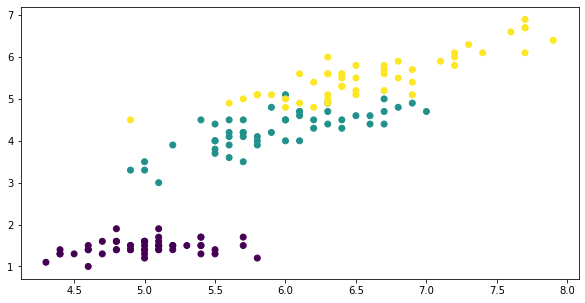

In [ ]:
# sepal length와 petal length에 따른 iris 종류를 그래프로 확인해보자.
plt.figure(figsize = (10, 5))
plt.scatter(x_iris.iloc[:, 0], x_iris.iloc[:, 2], c = data_iris.target)
plt.show()

## 2.2 모델링 및 평가

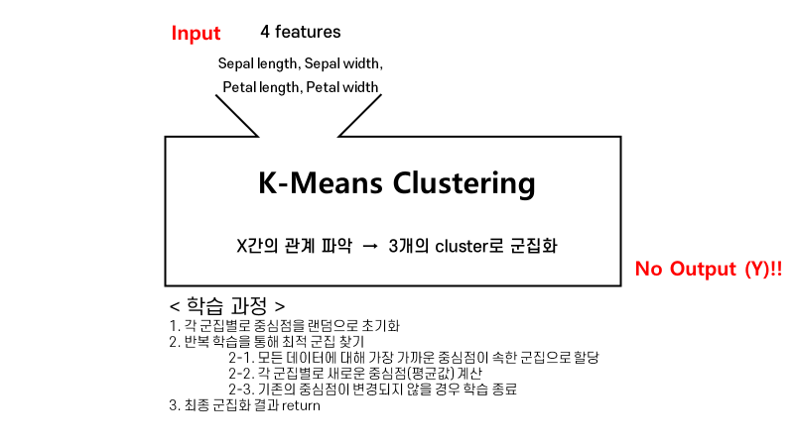

In [ ]:
from sklearn.cluster import KMeans

model_iris = KMeans(n_clusters=3, init='k-means++', random_state = 0)
model_iris.fit(x_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# 각 데이터가 어떤 클러스터에 포함되는지 확인해보자
print(model_iris.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
# pandas 데이터프레임의 groupby 연산을 활용하여 실제 붓꽃 품종 분류값과 얼마나 차이가 나는지 확인해보자
df_iris['cluster'] = model_iris.labels_
print(df_iris.groupby(['target','cluster'])['sepal length (cm)'].count())

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal length (cm), dtype: int64


클러스터의 label값은 단순히 클러스터를 구분하기 위해 정해놓은 숫자이므로 target값과 꼭 일치하지 않아도 된다.  
.  
분류 target이 '0'인 데이터는 모두 1번 클러스터으로 잘 군집화되었다.  
분류 target이 '1'인 데이터는 2개만 0번 클러스터으로 그루핑되었고, 나머지 48개는 모두 0번 클러스터으로 그루핑되었다.  
하지만 분류 target이 '2'인 데이터는 0번 클러스터에 36개, 2번 클러스터에 14개로 분산되어 그루핑되었다.

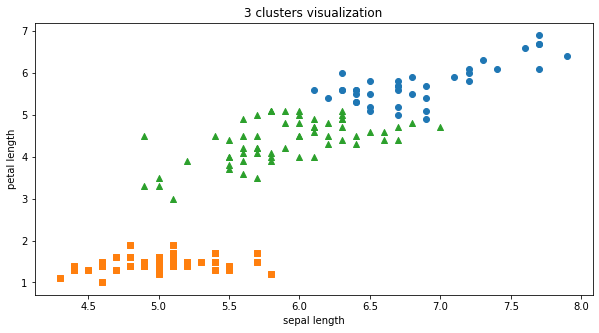

In [ ]:
# 이번에는 시각화를 통해 잘 군집화되었는지 확인해보자
plt.figure(figsize = (10, 5))

# 클러스터 값이 0, 1, 2 인 경우마다 별도의 인덱스를 추출
cluster0_index = df_iris[df_iris['cluster'] == 0].index
cluster1_index = df_iris[df_iris['cluster'] == 1].index
cluster2_index = df_iris[df_iris['cluster'] == 2].index

# 클러스터 0,1,2 에 해당하는 인덱스로 각 군집별 sepal length, petal length값 추출
plt.scatter(df_iris.iloc[cluster0_index, 0], df_iris.iloc[cluster0_index, 2], marker = 'o')
plt.scatter(df_iris.iloc[cluster1_index, 0], df_iris.iloc[cluster1_index, 2], marker = 's')
plt.scatter(df_iris.iloc[cluster2_index, 0], df_iris.iloc[cluster2_index, 2], marker = '^')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('3 clusters visualization')
plt.show()

# (심화학습)

## KMeans pseudocode



```
class KMeans(object):
    
    학습 과정
    def fit(X_data):
        1. 각 군집별로 중심점을 랜덤으로 초기화
        2. 반복 학습을 통해 최적 군집 찾기
            2-1. 모든 데이터에 대해 가장 가까운 중심점이 속한 군집으로 할당
            2-2. 각 군집별로 새로운 중심점(평균값) 계산
            2-3. 기존의 중심점이 변경되지 않을 경우 학습 종료
        3. 최종 군집화 결과 return

```

참고 : https://www.python-engineer.com/courses/mlfromscratch/12_kmeans/



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans():

    def __init__(self, k=5, max_iters=100, plot_steps=False):
        """
        [hyper_parameter]
        K: cluster 개수
        max_iters: 반복 학습 횟수
        plot_steps: 군집 시각화 여부
        """

        self.K = k
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # 각 cluster에 속한 데이터를 담는 리스트
        self.clusters = [[] for _ in range(self.K)]
        # 각 cluster의 중심점을 담는 리스트
        self.centroids = []


    # 학습 과정
    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # 각 cluster의 중심점을 랜덤으로 초기화
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # 반복 학습을 통해 최적 군집 찾기
        for _ in range(self.max_iters):
            # 중심점과의 거리를 기반으로 군집 형성 (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            # 새로 형성된 군집의 중심점 계산
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # 중심점이 더 이상 변경되지 않을 경우 학습 종료
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # 각 데이터가 속한 군집 index return
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # 각 데이터가 속한 군집의 label을 return 하는 함수
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels


    def _create_clusters(self, centroids):
        # 모든 데이터에 대해 가장 가까운 중심점이 속한 군집으로 할당
        clusters = [[] for _ in range(self.K)]

        for idx, sample in enumerate(self.X):
            # 가장 가까운 중심점이 속한 군집 index 도출
            centroid_idx = self._closest_centroid(sample, centroids)

            # 해당 군집에 데이터 할당
            clusters[centroid_idx].append(idx)
        return clusters


    def _closest_centroid(self, sample, centroids):
        # 각 중심점에 대해 euclidean 거리 계산
        distances = [euclidean_distance(sample, point) for point in centroids]

        # 가장 짧은 거리의 군집 index
        closest_index = np.argmin(distances)
        return closest_index


    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))

        # 각 군집의 중심점(평균 vector) 계산
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids


    def _is_converged(self, centroids_old, centroids):
        # 기존 중심점과 새로운 중심점과의 거리를 계산
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]

        # 하나의 중심점이라도 다른 경우 return False
        return sum(distances) == 0


    def plot(self): # 군집화 결과 시각화
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()

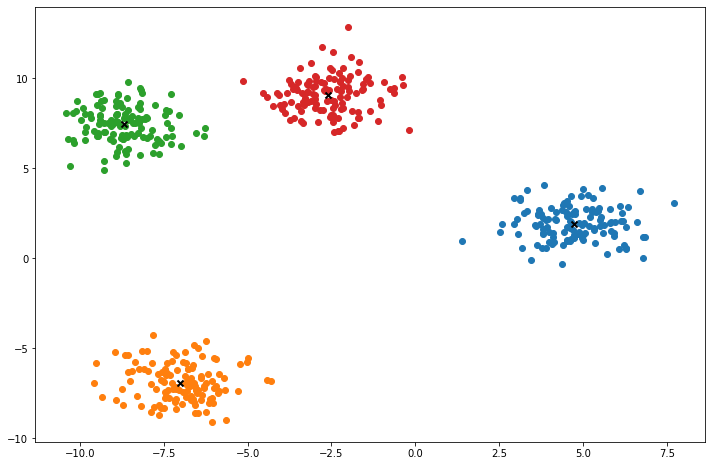

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(centers = 4, n_samples = 500, n_features = 2, shuffle = True, random_state = 42)

clusters = len(np.unique(y))

model = KMeans(k = clusters, max_iters=150, plot_steps=False)
y_pred = model.fit(X)

model.plot()

## 데이터의 개수가 많으면, K-Means의 수행 시간은 어떻게 달라질까?

데이터가 매우 커지지 않는 이상, 큰 차이는 나지 않습니다.

**[잠깐! 상식]**  
코드 수행 시간을 체크할 때, 보통 time 패키지를 사용합니다.  
time.time() 은 해당 현재 시각을 반환해주는 함수로서,  
이 함수를 수행시간을 체크해볼 코드 앞뒤에 넣어서 시각의 차이를 계산함으로써, 수행시간을 체크합니다.

In [ ]:
import time

start = time.time() 
model_r = KMeans(n_clusters=3, init="random", random_state = 0).fit(input_feature)
end = time.time()

print(end - start)

0.024753808975219727


In [ ]:
# n_samples를 20만개로 늘려 새로운 가상데이터를 생성해보자
input_expanded, _ = make_blobs(n_samples=200000, centers=3, cluster_std=0.8, random_state=30)

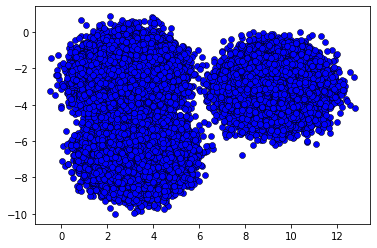

In [ ]:
plt.scatter(input_expanded[:, 0], input_expanded[:, 1], c='blue', edgecolor='k', lw=0.5)
plt.show()

In [ ]:
start = time.time()
model_r = KMeans(n_clusters=3, init="random", random_state = 0).fit(input_expanded)
end = time.time()

print(end - start)

0.9078826904296875


## K-Means 외의 다른 Clustering 방법론은 뭐가 있을까?

기본적인 K-Means 외에도 K-Means를 보완한 버전의 모델이 여러가지 있습니다.  
- `MeanShift Clustering` : 평균 이동 클러스터링  
    https://scikit-learn.org/stable/modules/clustering.html#mean-shift
- `MiniBatches KMeans Clustering` : 미니배치 KMeans 클러스터링  
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans


또한, K-Means와 다른 방식으로 클러스터링을 하는 모델도 여러가지 있습니다.  
계층적클러스터링, DBSCAN, Spectral Clustering 등이 있습니다.  

- `Hierarchical Clustering` : 계층적 클러스터링  
    https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
- `DBSCAN Clustering` : 밀도 기반 클러스터링  
    https://scikit-learn.org/stable/modules/clustering.html#dbscan
- `Spectral Clustering` : 스펙트럴 클러스터링  
    https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
    


## 댜양한 Clustering 방법 가운데, 어떤 것을 선택해야 할까?

기본적으로 각 방법론마다 궁합(?)이 맞는 특정 데이터 조건들이 있습니다.   
.  
자세한 내용은 직접 페이지에 들어가서 살펴봅시다.  
https://scikit-learn.org/stable/modules/clustering.html